In [1]:
import matplotlib.pyplot as plt
import geopandas
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

In [4]:
sigmine = geopandas.read_file("RS/RS.shp")

In [5]:
mapa_sigmine = {
'AREIA COMUM':'AREIA',
'AREIA FLUVIAL':'AREIA',
'AREIA QUARTZOSA':'AREIA',
'AREIA DE FUNDIÇÃO':'AREIA',
'AREIA INDUSTRIAL':'AREIA',
'ARGILA CAULÍNICA':'ARGILA',
'ARGILA REFRATÁRIA':'ARGILA',
'ARGILA VERMELHA':'ARGILA',
'ARENITO BETUMINOSO':'ARENITO',
'ARGILA P/CER. VERMELH':'ARGILA VERMELHA',
'BASALTO P/ BRITA':'BASALTO',
'BASALTO P/ REVESTIMENTO':'BASALTO',
'CALCÁRIO CALCÍTICO':'CALCÁRIO',
'CALCÁRIO CONCHÍFERO':'CALCÁRIO',
'CALCÁRIO DOLOMÍTICO':'CALCÁRIO',
'CALCÁRIO INDUSTRIAL':'CALCÁRIO',
'CARVÃO MINERAL':'CARVÃO',
'COBRE NATIVO':'COBRE',
'DIABÁSIO P/ BRITA':'DIABÁSIO',
'MINÉRIO DE CHUMBO':'CHUMBO',
'MINÉRIO DE COBRE':'COBRE',
'MINÉRIO DE OURO':'OURO',
'MINÉRIO DE TITÂNIO':'TITÂNIO',
'MINÉRIO DE ZINCO':'ZINCO',
'ÁGUA MINERAL ALC. BIC':'ÁGUA MINERAL',
'ÁGUA POTÁVEL DE MESA':'ÁGUA MINERAL'
}

sigmine['SUBS'] = sigmine['SUBS'].replace(mapa_sigmine)

In [6]:
sigmine['FASE'].unique()

array(['CONCESSÃO DE LAVRA', 'AUTORIZAÇÃO DE PESQUISA',
       'REQUERIMENTO DE LAVRA', 'DIREITO DE REQUERER A LAVRA',
       'LICENCIAMENTO', 'REQUERIMENTO DE PESQUISA',
       'REQUERIMENTO DE LICENCIAMENTO',
       'REQUERIMENTO DE LAVRA GARIMPEIRA', 'DISPONIBILIDADE',
       'LAVRA GARIMPEIRA', 'REQUERIMENTO DE REGISTRO DE EXTRAÇÃO',
       'REGISTRO DE EXTRAÇÃO'], dtype=object)

In [7]:
filtro_req1 = sigmine['FASE'] != 'REQUERIMENTO DE PESQUISA'
filtro_req2 = sigmine['FASE'] != 'REQUERIMENTO DE LICENCIAMENTO'
filtro_req3 = sigmine['FASE'] != 'REQUERIMENTO DE LAVRA GARIMPEIRA'
filtro_req4 = sigmine['FASE'] != 'REQUERIMENTO DE REGISTRO DE EXTRAÇÃO'

sigmine = sigmine[filtro_req1 & filtro_req2 & filtro_req3 & filtro_req4]

In [8]:
filtro_n_cad = sigmine['SUBS'] != 'DADO NÃO CADASTRADO'
sigmine = sigmine[filtro_n_cad]

In [9]:
len(sigmine)

8557

In [10]:
sigmine.head()

,PROCESSO,ID,NUMERO,ANO,AREA_HA,FASE,ULT_EVENTO,NOME,SUBS,USO,UF,geometry
0,2839/1935,{01BC40B2-0EBF-4DE5-A501-101C275BA993},2839,1935,2346.20,CONCESSÃO DE LAVRA,473 - CONC LAV/CUMPRIMENTO EXIGÊNCIA PROTOCOLI...,COPELMI MINERAÇÃO LTDA,ARGILA,Não informado,RS,"POLYGON Z ((-52.03240 -30.14235 0.00000, -52.0..."
1,2122/1936,{94B1C54F-BD58-4764-9E1D-C4C396FAE042},2122,1936,1778.30,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Luzia Jurema Vidal de Souza,CHUMBO,Não informado,RS,"POLYGON Z ((-53.90409 -30.81146 0.00000, -53.9..."
2,212201/1936,{F5843416-9EB6-42AE-8762-A3B83163FEC7},212201,1936,1064.87,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Luzia Jurema Vidal de Souza,CHUMBO,Não informado,RS,"POLYGON Z ((-53.84127 -30.82963 0.00000, -53.8..."
3,4632/1938,{994E7002-29BC-4CF3-BD14-05F333545B21},4632,1938,98.01,CONCESSÃO DE LAVRA,536 - CONC LAV/TRANSF DIREITOS -DISTRATO PROTO...,Comican Companhia de Mineração Candiota,CALCÁRIO,Não informado,RS,"POLYGON Z ((-52.93207 -32.03117 0.00000, -52.9..."
4,2942/1939,{1B49D2DE-1FFE-44DE-8C72-53B53E5A7187},2942,1939,1083.84,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Companhia Riograndense de Mineração,CARVÃO,Não informado,RS,"POLYGON Z ((-52.04240 -30.12647 0.00000, -52.0..."


In [11]:
for i in np.sort(sigmine['SUBS'].unique()):
    f = sigmine['SUBS'] == i
    d = sigmine[f]
    print(i,d['USO'].unique())

AMETISTA ['Não informado' 'Pedra de coleção' 'Gema' 'Pedra decorativa']
ANDESITO ['Não informado']
ANTRACITO ['Não informado']
AREIA ['Construção civil' 'Não informado' 'Industrial']
ARENITO ['Não informado' 'Construção civil' 'Industrial' 'Revestimento']
ARGILA ['Não informado' 'Industrial' 'Construção civil' 'Cerâmica vermelha']
ARGILA VERMELHA ['Cerâmica vermelha']
ARGILITO ['Não informado' 'Industrial' 'Cerâmica vermelha']
BARITA ['Industrial']
BASALTO ['Não informado' 'Construção civil' 'Brita' 'Industrial' 'Pedra de talhe'
 'Revestimento']
BENTONITA ['Não informado' 'Industrial']
CALCEDÔNIA ['Pedra decorativa' 'Industrial' 'Artesanato  mineral' 'Pedra de coleção']
CALCÁRIO ['Não informado' 'Brita' 'Fabricação de cimento' 'Industrial'
 'Fabricação de cal' 'Corretivo de solo']
CARVÃO ['Não informado' 'Industrial' 'Energético']
CASCALHO ['Não informado' 'Construção civil' 'Revestimento' 'Brita']
CASSITERITA ['Não informado' 'Industrial']
CAULIM ['Não informado' 'Cerâmica vermelha' '

In [12]:
f1 = sigmine['USO'] == 'Construção civil'
f2 = sigmine['USO'] == 'Fabricação de cimento'
f3 = sigmine['USO'] == 'Brita'
f4 = sigmine['USO'] == 'Não informado'
civil = sigmine[f1 | f2 | f3 | f4]

f5 = sigmine['SUBS'] == 'AREIA'
f6 = sigmine['SUBS'] == 'AREIA DE FUNDIÇÃO'
f7 = sigmine['SUBS'] == 'AREIA QUARTZOSA'
f8 = sigmine['SUBS'] == 'AREIA COMUM'
f9 = sigmine['SUBS'] == 'AREIA FLUVIAL'
f10 = sigmine['SUBS'] == 'ARENITO'
f11 = sigmine['SUBS'] == 'ARGILA'
f12 = sigmine['SUBS'] == 'ARGILA REFRATÁRIA'
f13 = sigmine['SUBS'] == 'ARGILITO'
f14 = sigmine['SUBS'] == 'BASALTO'
f15 = sigmine['SUBS'] == 'BASALTO P/ BRITA'
f16 = sigmine['SUBS'] == 'BENTONITA'
f17 = sigmine['SUBS'] == 'CALCÁRIO'
f18 = sigmine['SUBS'] == 'CALCÁRIO CALCÍTICO'
f19 = sigmine['SUBS'] == 'CASCALHO'
f20 = sigmine['SUBS'] == 'DIABÁSIO'
f21 = sigmine['SUBS'] == 'DIABÁSIO P/ BRITA'
f22 = sigmine['SUBS'] == 'GABRO'
f23 = sigmine['SUBS'] == 'GNAISSE'
f24 = sigmine['SUBS'] == 'GRANITO'
f25 = sigmine['SUBS'] == 'QUARTZITO'
f26 = sigmine['SUBS'] == 'RIÓLITO'
f27 = sigmine['SUBS'] == 'SAIBRO'
civil = civil[f5 | f6 | f7 | f8 | f9 | f10 | f11 | f12 | f13 | f14 | f15 | f16 | f17 | f18 | f19 | f20 | f21 | f22 | f23 | f24 | f25 | f26 | f27]

In [13]:
f1 = sigmine['SUBS'] == 'CALCÁRIO'
f2 = sigmine['SUBS'] == 'CALCÁRIO DOLOMÍTICO'
f3 = sigmine['SUBS'] == 'CALCÁRIO CALCÍTICO'
f4 = sigmine['SUBS'] == 'CALCÁRIO CONCHÍFERO'
f5 = sigmine['SUBS'] == 'CONCHAS CALCÁRIAS'
f6 = sigmine['SUBS'] == 'PEDRA CALCÁRIA'
f7 = sigmine['SUBS'] == 'CAULIM'
f8 = sigmine['SUBS'] == 'DOLOMITO'
f9 = sigmine['SUBS'] == 'FOSFATO'
f10 = sigmine['SUBS'] == 'TALCO'
agricolas = sigmine[f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 | f9 | f10]

In [14]:
f1 = sigmine['SUBS'] == 'ANTRACITO'
f2 = sigmine['SUBS'] == 'ARENITO BETUMINOSO'
f3 = sigmine['SUBS'] == 'CARVÃO MINERAL'
f4 = sigmine['SUBS'] == 'FOLHELHO BETUMINOSO'
f5 = sigmine['SUBS'] == 'FOLHELHO PIROBETUMINOSO'
f6 = sigmine['SUBS'] == 'LINHITO'
f7 = sigmine['SUBS'] == 'ROCHA BETUMINOSA'
f8 = sigmine['SUBS'] == 'SAPROPELITO'
f9 = sigmine['SUBS'] == 'TURFA'
f10 = sigmine['SUBS'] == 'CARVÃO'

energeticos = sigmine[f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 | f9 | f10]

In [15]:
f1 = sigmine['SUBS'] == 'CASSITERITA'
f2 = sigmine['SUBS'] == 'CHUMBO'
f3 = sigmine['SUBS'] == 'COBRE'
f4 = sigmine['SUBS'] == 'FERRO'
f5 = sigmine['SUBS'] == 'ILMENITA'
f6 = sigmine['SUBS'] == 'LIMONITA'
f7 = sigmine['SUBS'] == 'MINÉRIO DE CHUMBO'
f8 = sigmine['SUBS'] == 'MINÉRIO DE COBRE'
f9 = sigmine['SUBS'] == 'MINÉRIO DE OURO'
f10 = sigmine['SUBS'] == 'MINÉRIO DE TITÂNIO'
f11 = sigmine['SUBS'] == 'MINÉRIO DE ZINCO'
f12 = sigmine['SUBS'] == 'MOLIBDÊNIO'
f13 = sigmine['SUBS'] == 'OURO'
f14 = sigmine['SUBS'] == 'PRATA'
f15 = sigmine['SUBS'] == 'TANTALITA'
f16 = sigmine['SUBS'] == 'TITÂNIO'
metalicos = sigmine[f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 | f9 | f10 | f11 | f12 | f13 | f14 | f15 | f16]

In [16]:
f1 = sigmine['USO'] == 'Cerâmica vermelha'
f2 = sigmine['USO'] == 'Industrial'
f3 = sigmine['USO'] == 'Não informado'
ceramicas = sigmine[f1 | f2 | f3]

f4 = sigmine['SUBS'] == 'ARGILA'
f5 = sigmine['SUBS'] == 'CALCÁRIO'
f6 = sigmine['SUBS'] == 'ARGILA REFRATÁRIA'
f7 = sigmine['SUBS'] == 'ARGILA VERMELHA'
f8 = sigmine['SUBS'] == 'ARGILA CAULÍNICA'
f9 = sigmine['SUBS'] == 'ARGILA P/CER. VERMELH'
f10 = sigmine['SUBS'] == 'ARGILITO'
f11 = sigmine['SUBS'] == 'BENTONITA'
f12 = sigmine['SUBS'] == 'CAULIM'
f13 = sigmine['SUBS'] == 'FILITO'
ceramicas = ceramicas[f4 | f5 | f6 | f7 | f8 | f9 | f10 | f11 | f12 | f13]

In [17]:
f1 = sigmine['USO'] == 'Construção civil'
f2 = sigmine['USO'] == 'Pedra de Talhe'
f3 = sigmine['USO'] == 'Pedra decorativa'
f4 = sigmine['USO'] == 'Revestimento'
f5 = sigmine['USO'] == 'Não informado'
ornamentais = sigmine[f1 | f2 | f3 | f4 | f5]

f6 = sigmine['SUBS'] == 'ANORTOSITO'
f7 = sigmine['SUBS'] == 'ARENITO'
f8 = sigmine['SUBS'] == 'BASALTO'
f9 = sigmine['SUBS'] == 'BASALTO P/ REVESTIMENTO'
f10 = sigmine['SUBS'] == 'DIABÁSIO'
f11 = sigmine['SUBS'] == 'GRANITO'
f12 = sigmine['SUBS'] == 'GRANITO ORNAMENTAL'
f13 = sigmine['SUBS'] == 'MÁMORE'
f14 = sigmine['SUBS'] == 'QUARTZITO'
f15 = sigmine['SUBS'] == 'RIÓLITO'
f16 = sigmine['SUBS'] == 'SIENITO'
ornamentais = ornamentais[f6 | f7 | f8 | f9 | f10 | f11 | f12 | f13 | f14 | f15 | f16]

In [18]:
f1 = sigmine['SUBS'] == 'ÁGATA'
f2 = sigmine['SUBS'] == 'ÁGUA MARINHA'
f3 = sigmine['SUBS'] == 'AMETISTA'
f4 = sigmine['SUBS'] == 'CALCEDÔNIA'
f5 = sigmine['SUBS'] == 'CITRINO'
f6 = sigmine['SUBS'] == 'GEMA'
f7 = sigmine['SUBS'] == 'OPALA'
f8 = sigmine['SUBS'] == 'QUARTZO'

gemas = sigmine[f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8]

In [19]:
f1 = sigmine['SUBS'] == 'ÁGUA MINERAL ALC. BIC'
f2 = sigmine['SUBS'] == 'ÁGUA MINERAL'
f3 = sigmine['SUBS'] == 'ÁGUA POTÁVEL DE MESA'

aguas = sigmine[f1 | f2 | f3]

In [20]:
grupos = {'Materiais para construção civil':civil,
          'Insumos agrícolas': agricolas,
          'Recursos energéticos': energeticos,
          'Minerais metálicos': metalicos,
          'Indústria cerâmica': ceramicas,
          'Rochas ornamentais': ornamentais,
          'Pedras preciosas':gemas,
          'Águas minerais': aguas
         }

In [21]:
municipios = geopandas.read_file('municipios/Municipios_IBGE.shp')

In [22]:
municipios.head()

,MSLINK,MAPID,AREA_1,PERIMETRO_,NOME,SEDE,LATITUDESE,LONGITUDES,AREA_TOT_G,Cod_ibge,Label_N,geometry
0,4985,99,118.280,61.626,HERVEIRAS,1,-29.407,-52.653,118.280,4309571,Herveiras,"POLYGON ((-52.77319 -29.44486, -52.77602 -29.4..."
1,4986,99,228.849,81.715,HORIZONTINA,1,-27.626,-54.308,228.849,4309605,Horizontina,"POLYGON ((-54.39910 -27.57012, -54.38675 -27.5..."
2,4987,99,822.943,184.883,HULHA NEGRA,1,-31.404,-53.869,822.943,4309654,Hulha Negra,"POLYGON ((-53.98933 -31.55208, -53.99221 -31.5..."
3,4988,99,135.246,70.392,HUMAITA,1,-27.563,-53.974,135.246,4309704,Humaitá,"POLYGON ((-54.07227 -27.57674, -54.06089 -27.5..."
4,4989,99,193.109,70.655,IBARAMA,1,-29.419,-53.135,193.109,4309753,Ibarama,"POLYGON ((-53.26582 -29.44975, -53.26701 -29.4..."


In [23]:
lista_municipio = ['Caxias do Sul', 'Santa Maria', 'Porto Alegre', 'Pelotas']
def plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05):
    x = []
    y = []
    for index, row in municipios.iterrows():
        for m in lista_municipio:
            if row['NOME'] == m.upper():
                y.append(row['LATITUDESE'])
                x.append(row['LONGITUDES'])
    ax.scatter(x=x, y=y, marker='x', c=c)
    for i, txt in enumerate(lista_municipio[::-1]):
        ax.annotate(txt, (x[i]+delta, y[i]+delta), c=c)

In [24]:
for grupo in grupos:
    municipios[grupo] = np.ones(len(municipios)) * float('nan')
    geometrias = grupos[grupo]['geometry'].to_crs("EPSG:4326")
    centroides = geometrias.centroid
    for index, row in municipios.iterrows():
        poly = row['geometry']
        count = 0
        for p in centroides:
            if p.within(poly):
                count = count + 1
        #print(row['NOME'], mineral, count)
        municipios.at[index, grupo] = int(count)

In [25]:
municipios.head()

,MSLINK,MAPID,AREA_1,PERIMETRO_,NOME,SEDE,LATITUDESE,LONGITUDES,AREA_TOT_G,Cod_ibge,Label_N,geometry,Materiais para construção civil,Insumos agrícolas,Recursos energéticos,Minerais metálicos,Indústria cerâmica,Rochas ornamentais,Pedras preciosas,Águas minerais
0,4985,99,118.280,61.626,HERVEIRAS,1,-29.407,-52.653,118.280,4309571,Herveiras,"POLYGON ((-52.77319 -29.44486, -52.77602 -29.4...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4986,99,228.849,81.715,HORIZONTINA,1,-27.626,-54.308,228.849,4309605,Horizontina,"POLYGON ((-54.39910 -27.57012, -54.38675 -27.5...",36.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,4987,99,822.943,184.883,HULHA NEGRA,1,-31.404,-53.869,822.943,4309654,Hulha Negra,"POLYGON ((-53.98933 -31.55208, -53.99221 -31.5...",3.0,2.0,23.0,0.0,2.0,0.0,0.0,0.0
3,4988,99,135.246,70.392,HUMAITA,1,-27.563,-53.974,135.246,4309704,Humaitá,"POLYGON ((-54.07227 -27.57674, -54.06089 -27.5...",2.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0
4,4989,99,193.109,70.655,IBARAMA,1,-29.419,-53.135,193.109,4309753,Ibarama,"POLYGON ((-53.26582 -29.44975, -53.26701 -29.4...",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
grupos_m = municipios.columns[12:]
#minerais = [municipios.columns[14]]

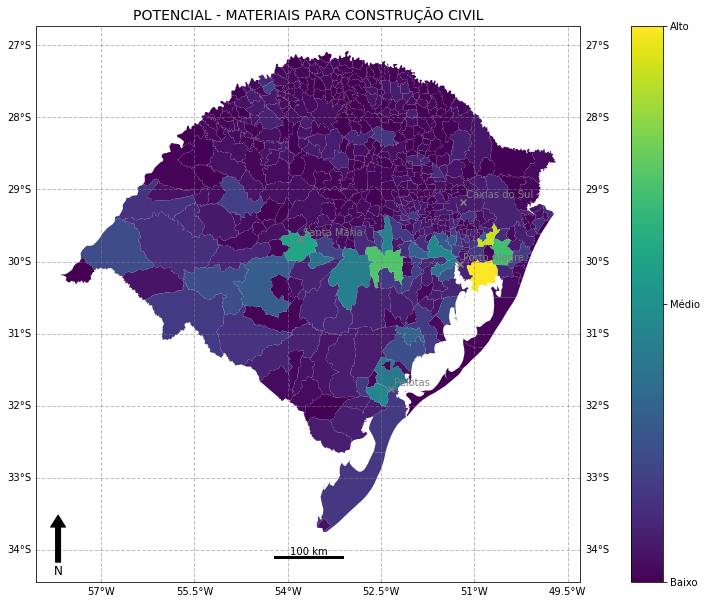

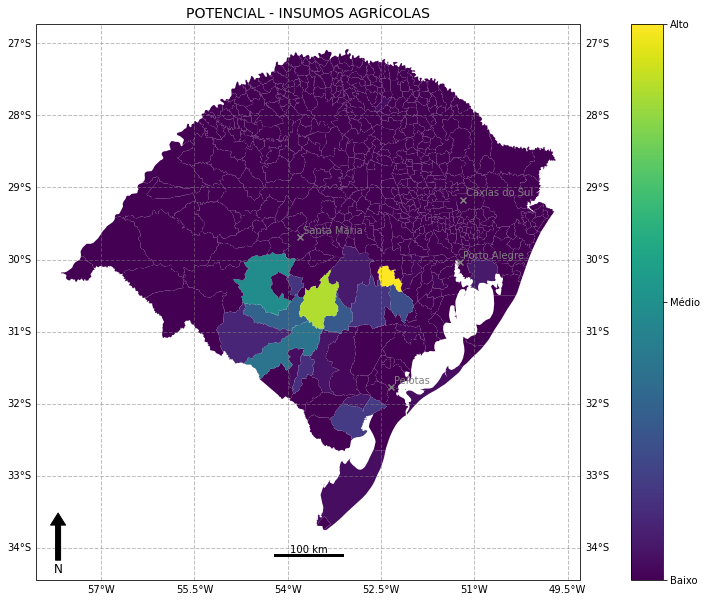

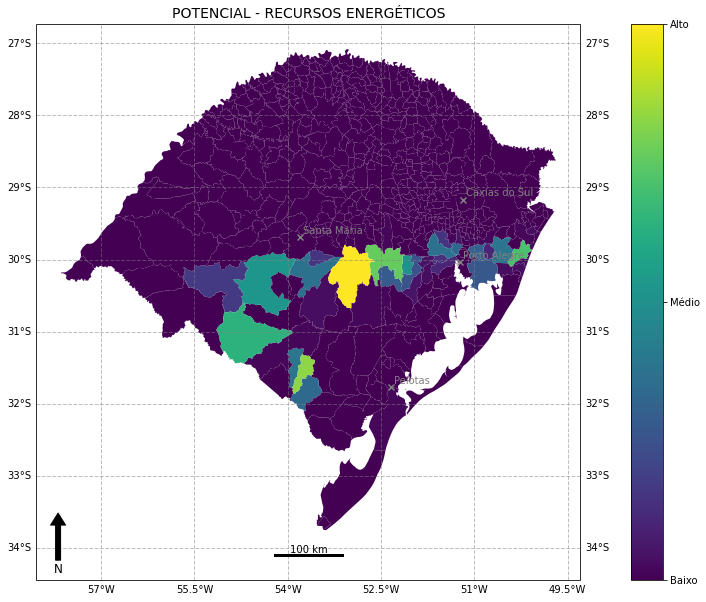

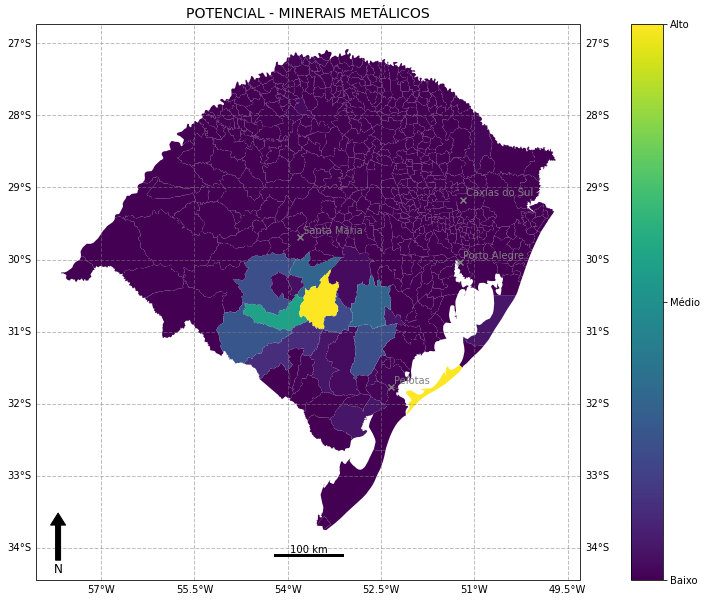

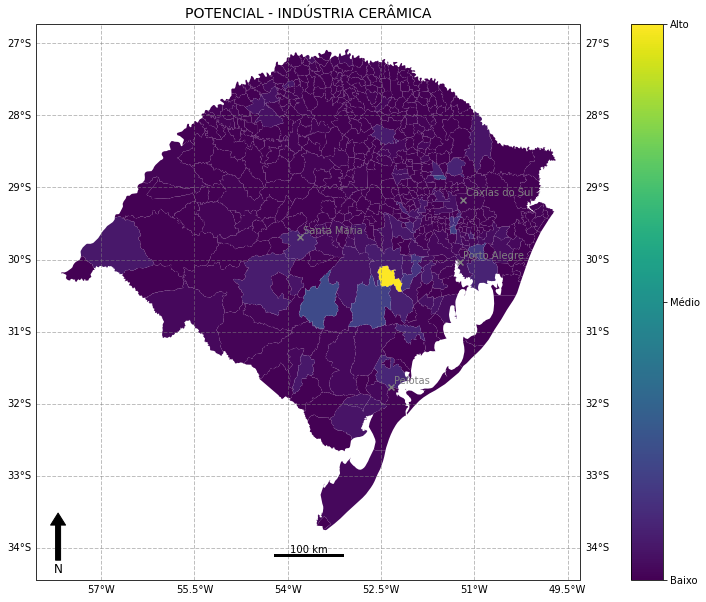

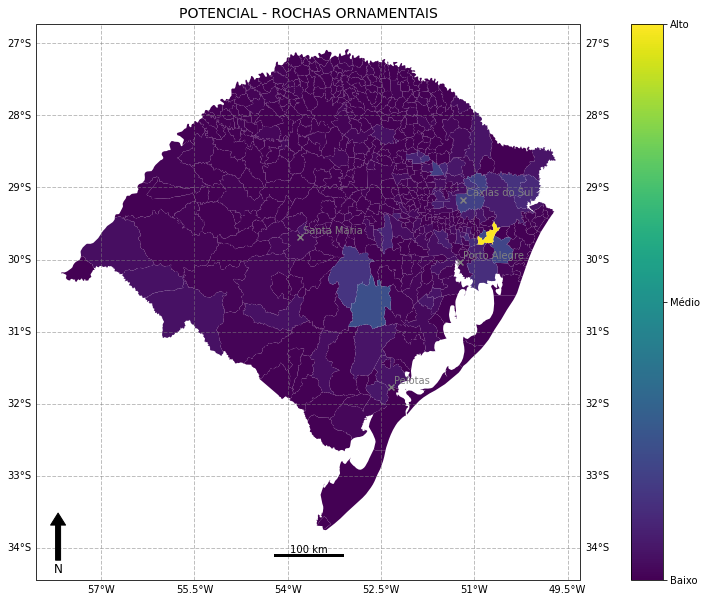

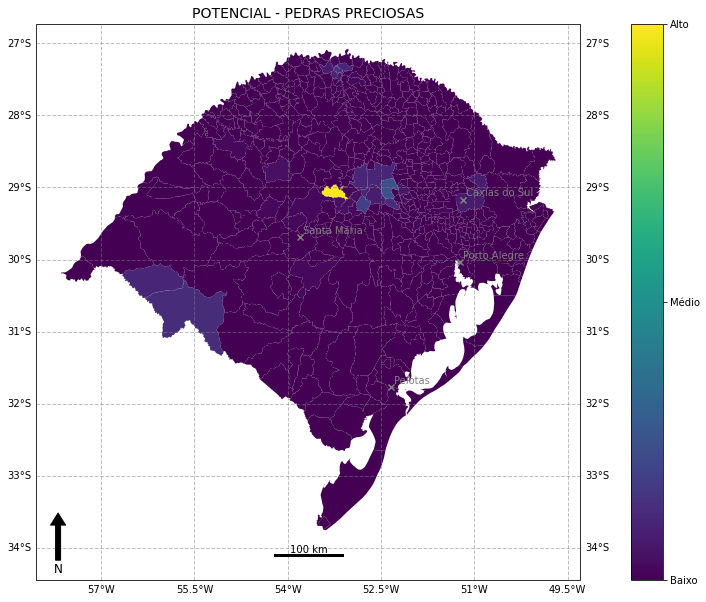

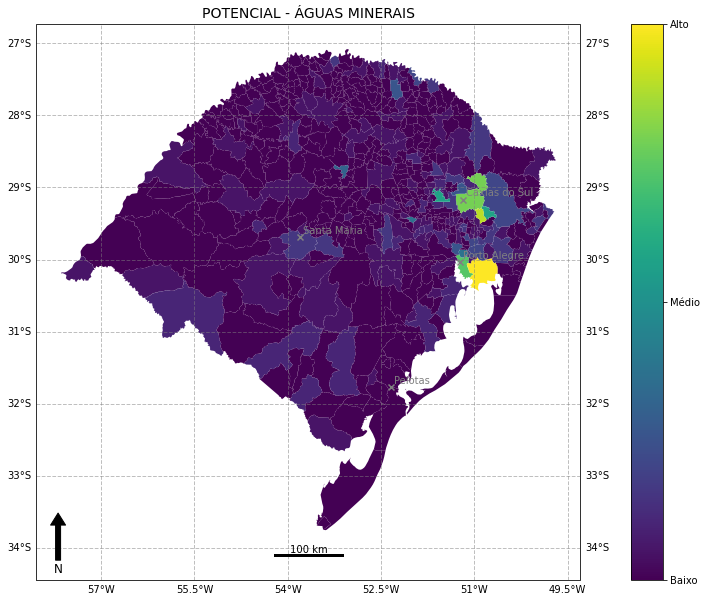

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

for grupo in grupos_m:
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
    municipios.plot(ax=ax, column=grupo, legend=False)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
    vmax = municipios[grupo].values.max()
    mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=100))
    fig.add_axes(ax_cb)
    cbar = fig.colorbar(mappable, cax=ax_cb, ticks=[0, 50, 100])
    cbar.ax.set_yticklabels(['Baixo', 'Médio', 'Alto'])

    x, y, arrow_length = 0.04, 0.12, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=12,
    xycoords=ax.transAxes)

    scale_bar(ax, 100, location=(0.5,0.01))

    ax.set_title('POTENCIAL - {}'.format(grupo.upper()), loc='center', fontsize='14')
    #fig.suptitle('Potencial - {}'.format(grupo), fontsize='14')
    
    plot_municipios(municipios, lista_municipio, ax, c='gray', delta=0.05)
    
    #nome = mineral.replace('/', '')
    plt.savefig('imagens/potencial/grupo/'+grupo+".png", bbox_inches='tight', facecolor='white', dpi = 300)
    #plt.show()

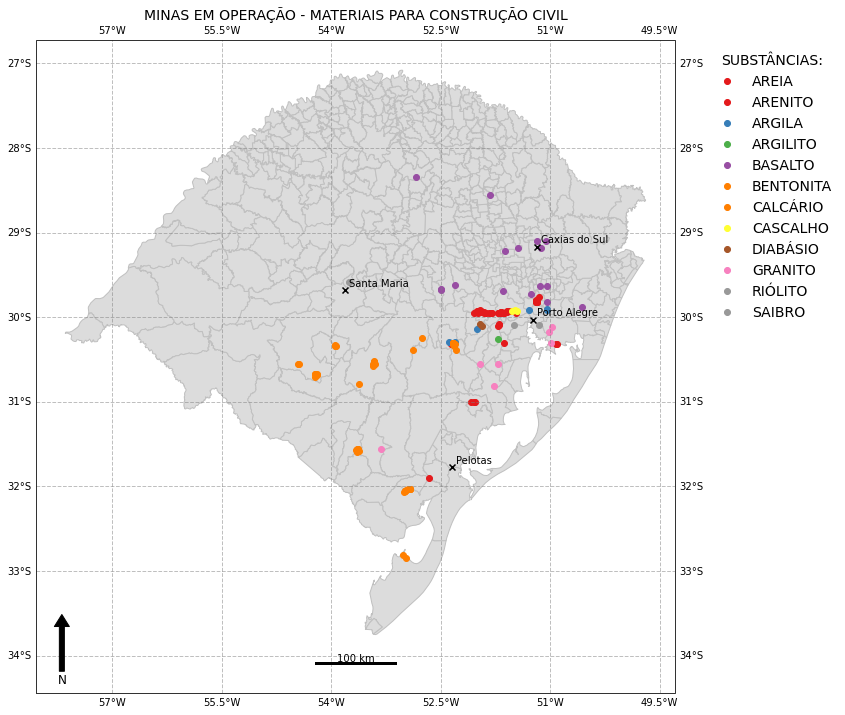

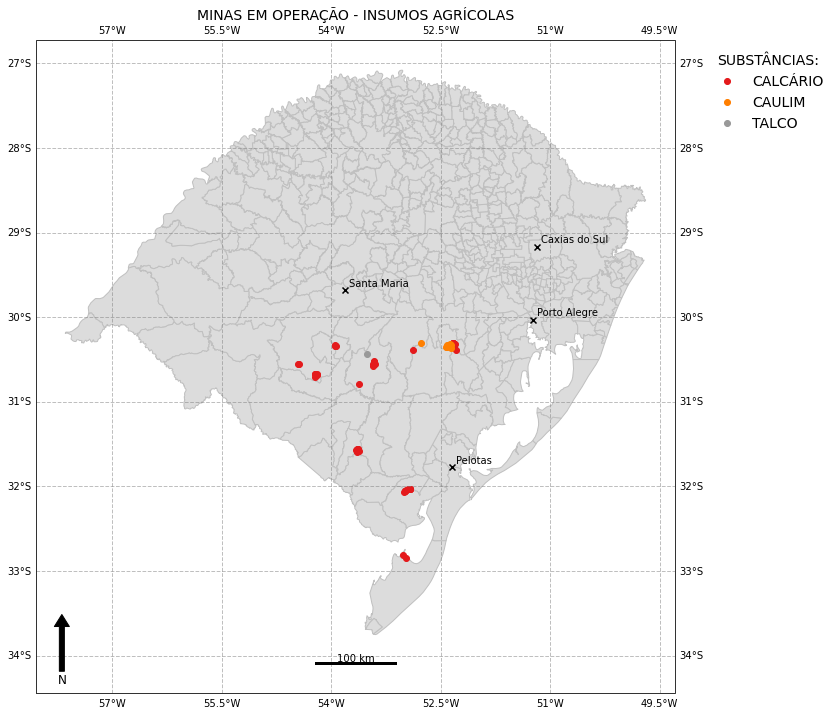

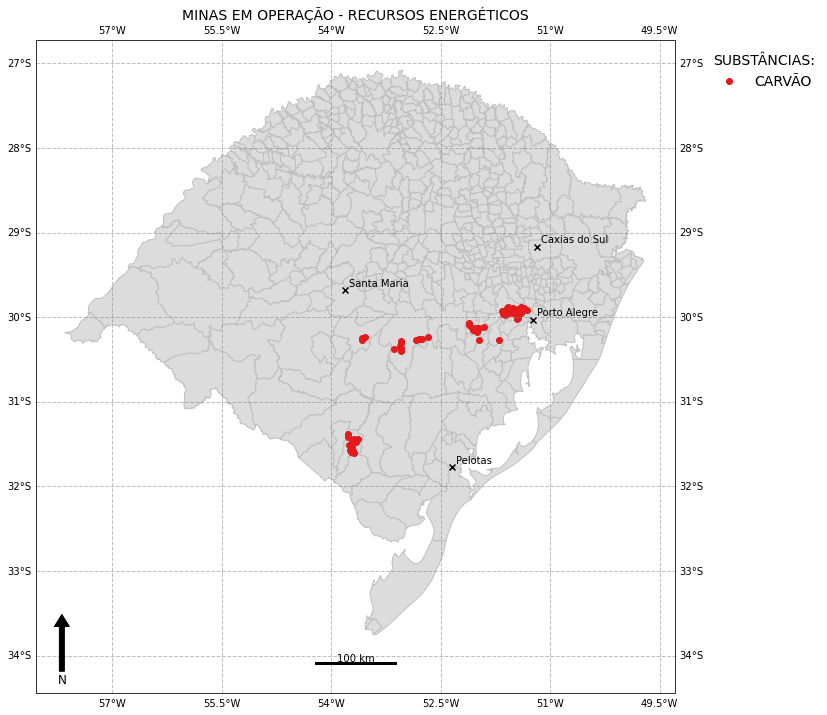

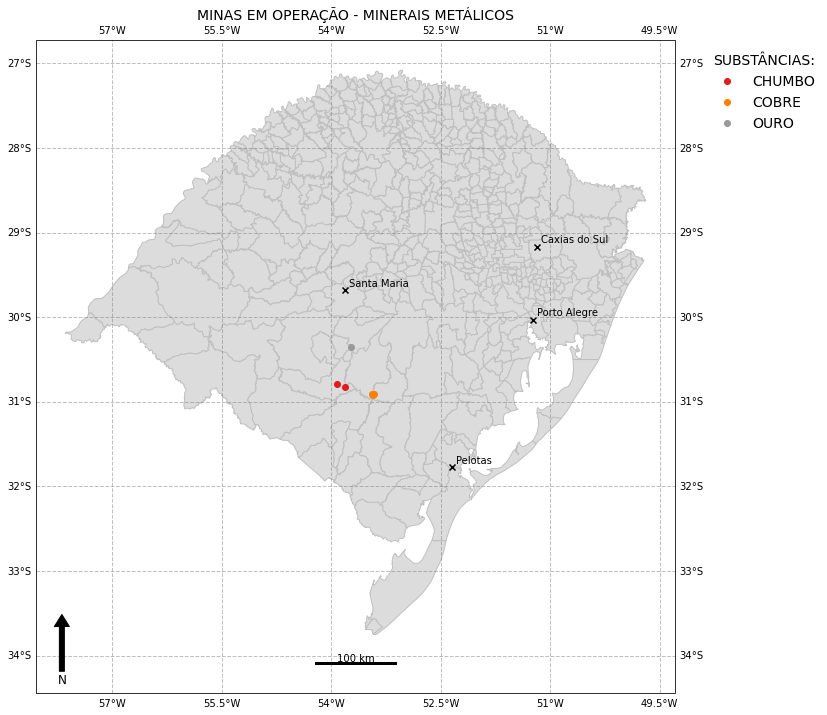

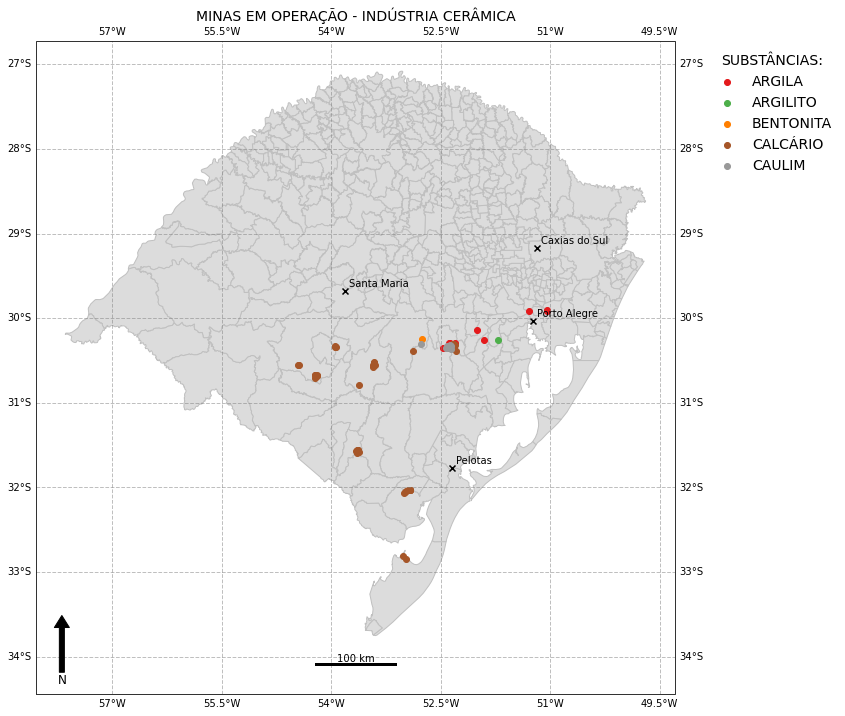

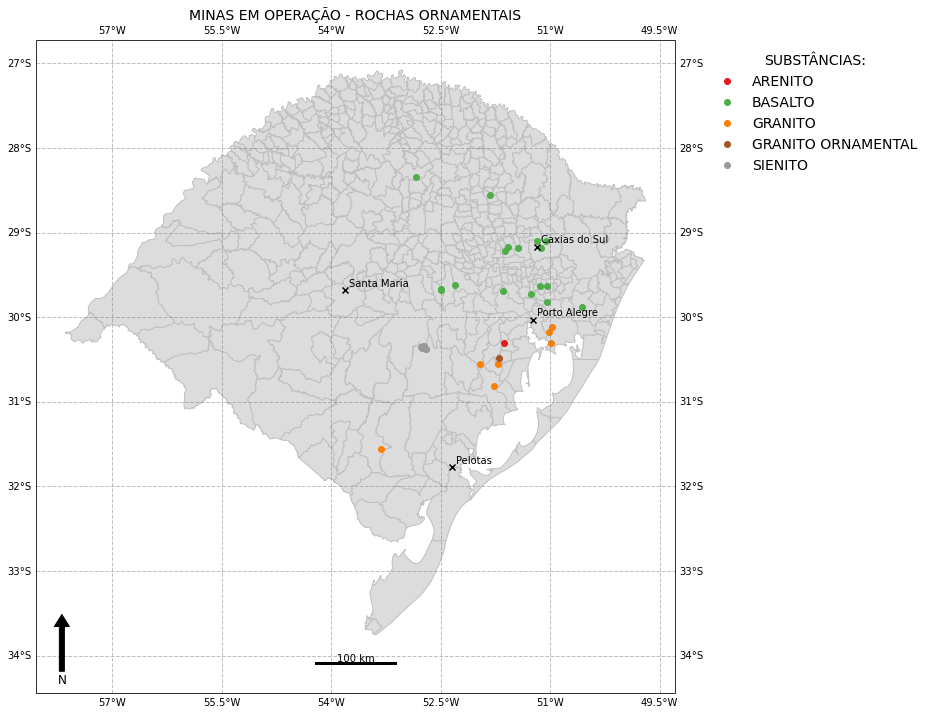

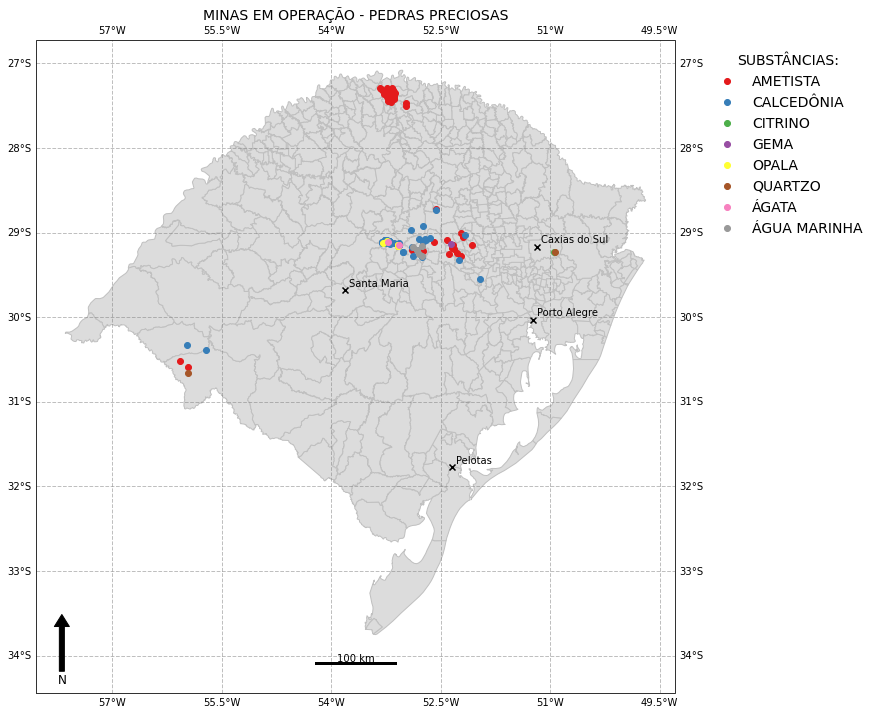

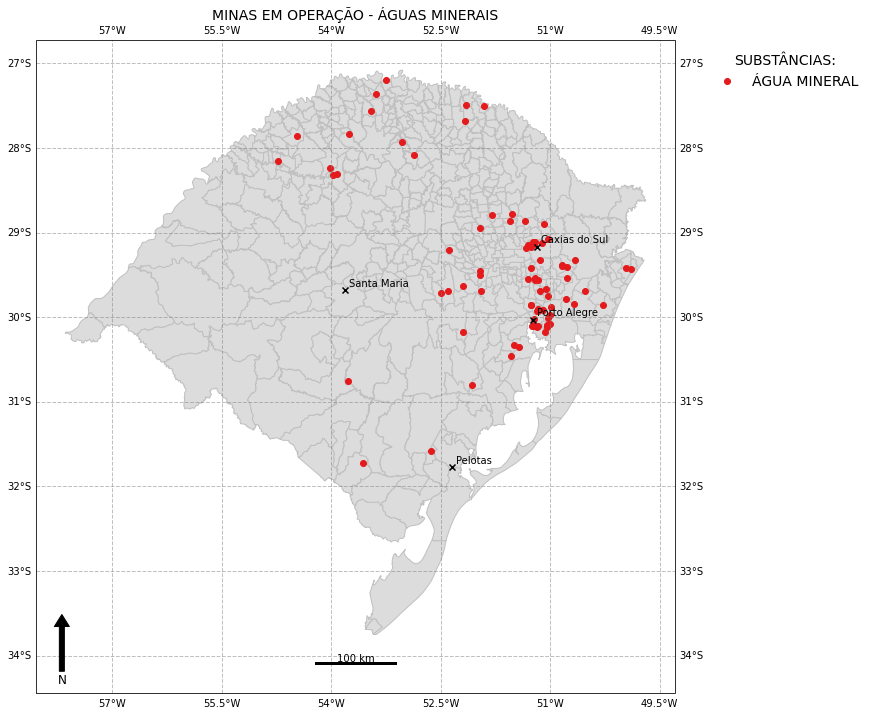

In [28]:
for grupo in grupos:
    f = grupos[grupo]['FASE'] == 'CONCESSÃO DE LAVRA'
    f1 = grupos[grupo]['FASE'] == 'LAVRA GARIMPEIRA'
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
    municipios.plot(ax=ax, color='gainsboro', edgecolor='silver')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    #gl.xlabels_top = False

    gp = grupos[grupo][f | f1]
    gp = gp.sort_values('SUBS')
    
    #colors
    colormap = plt.cm.Set1
    colors = [colormap(i) for i in np.linspace(0, 1., len(gp['SUBS'].unique()))]
    ax.set_prop_cycle('color', colors)
    
    geometrias = gp['geometry'].to_crs("EPSG:4326")
    gp['centroids'] = geometrias.centroid
    #gp.plot(ax=ax, column='SUBS', legend=True)
    for sub in gp['SUBS'].unique():
        f_sub = gp['SUBS'] == sub
        x = [c.x for c in gp[f_sub]['centroids']]
        y = [c.y for c in gp[f_sub]['centroids']]
        ax.scatter(x, y, label=sub)

    x, y, arrow_length = 0.04, 0.12, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=12,
    xycoords=ax.transAxes)

    scale_bar(ax, 100, location=(0.5,0.01))
    
    plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05)

    ax.set_title('MINAS EM OPERAÇÃO - {}'.format(grupo.upper()), loc='center', fontsize='14')
    #fig.suptitle('Potencial - {}'.format(grupo), fontsize='14')
    plt.legend(bbox_to_anchor=(1.04, 1), edgecolor = 'white', fontsize='14', title='SUBSTÂNCIAS:', title_fontsize='14', loc='upper left')
    
    #nome = mineral.replace('/', '')
    plt.savefig('imagens/operacao/'+grupo+".png", bbox_inches='tight', facecolor='white', dpi = 300)
    #plt.show()